# PROJECT UNDERSTANDING

### Problem Statement
Heart disease remains a significant public health concern in Kenya, with increasing cases linked to lifestyle changes, urbanization, and inadequate access to preventive healthcare. Despite growing awareness, early detection and risk assessment remain challenging due to limited local research and data-driven insights. This study aims to analyze key health indicators. By identifying major risk factors and trends, this research seeks to support healthcare professionals, policymakers, and researchers in developing targeted interventions, improving early diagnosis, and enhancing public health strategies to combat heart disease in Kenya.

### Objectives
- To analyze trends in heart disease prevalence based on demographic and lifestyle data.
- To develop predictive models for assessing heart disease risk.
- To provide insights for healthcare professionals and policymakers to enhance preventive strategies.

### Expected Outcomes
- A predictive model for early detection of heart disease risk.
- Data-driven recommendations for improving heart disease prevention and awareness.

# DATA UNDERSTANDING

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
import numpy as np

# Ignore warnings
warnings.filterwarnings("ignore")

In [100]:
data = pd.read_csv("heart_disease.csv")

In [101]:
data.head()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No


In [102]:
data.columns

Index(['Age', 'Gender', 'Blood Pressure', 'Cholesterol Level',
       'Exercise Habits', 'Smoking', 'Family Heart Disease', 'Diabetes', 'BMI',
       'High Blood Pressure', 'Low HDL Cholesterol', 'High LDL Cholesterol',
       'Alcohol Consumption', 'Stress Level', 'Sleep Hours',
       'Sugar Consumption', 'Triglyceride Level', 'Fasting Blood Sugar',
       'CRP Level', 'Homocysteine Level', 'Heart Disease Status'],
      dtype='object')

In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Alcohol Consumption   9968 non-null   object 
 13  Stress Level          9978 non-null   object 
 14  Sleep Hours           9975 non-null   float64
 15  Sugar Consumption   

In [104]:
data.isna().sum()

Age                     29
Gender                  19
Blood Pressure          19
Cholesterol Level       30
Exercise Habits         25
Smoking                 25
Family Heart Disease    21
Diabetes                30
BMI                     22
High Blood Pressure     26
Low HDL Cholesterol     25
High LDL Cholesterol    26
Alcohol Consumption     32
Stress Level            22
Sleep Hours             25
Sugar Consumption       30
Triglyceride Level      26
Fasting Blood Sugar     22
CRP Level               26
Homocysteine Level      20
Heart Disease Status     0
dtype: int64

In [105]:
data.duplicated().sum()

0

In [106]:
data.tail()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
9995,25.0,Female,136.0,243.0,Medium,Yes,No,No,18.788791,Yes,...,Yes,Medium,High,6.834954,Medium,343.0,133.0,3.588814,19.132004,Yes
9996,38.0,Male,172.0,154.0,Medium,No,No,No,31.856801,Yes,...,Yes,None,High,8.247784,Low,377.0,83.0,2.658267,9.715709,Yes
9997,73.0,Male,152.0,201.0,High,Yes,No,Yes,26.899911,No,...,Yes,None,Low,4.436762,Low,248.0,88.0,4.408867,9.492429,Yes
9998,23.0,Male,142.0,299.0,Low,Yes,No,Yes,34.964026,Yes,...,Yes,Medium,High,8.526329,Medium,113.0,153.0,7.215634,11.873486,Yes
9999,38.0,Female,128.0,193.0,Medium,Yes,Yes,Yes,25.111295,No,...,Yes,High,Medium,5.659394,High,121.0,149.0,14.387810,6.208531,Yes


In [107]:
# Data Cleaning
# Handling missing values
imputer = SimpleImputer(strategy='mean')
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_cols] = imputer.fit_transform(data[numerical_cols])

data.dropna(inplace=True)  # Drop remaining categorical missing values

In [108]:
data.isna().sum()

Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Exercise Habits         0
Smoking                 0
Family Heart Disease    0
Diabetes                0
BMI                     0
High Blood Pressure     0
Low HDL Cholesterol     0
High LDL Cholesterol    0
Alcohol Consumption     0
Stress Level            0
Sleep Hours             0
Sugar Consumption       0
Triglyceride Level      0
Fasting Blood Sugar     0
CRP Level               0
Homocysteine Level      0
Heart Disease Status    0
dtype: int64

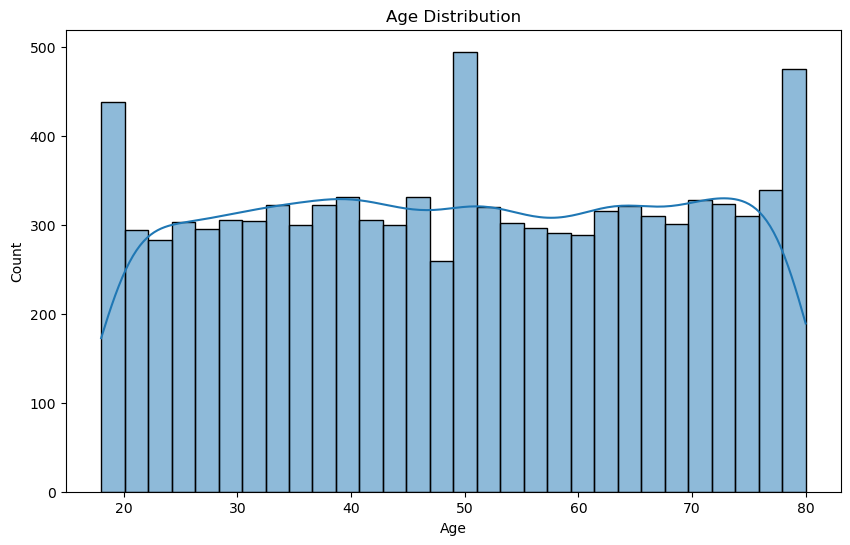

In [109]:
# Exploratory Data Analysis (EDA)
plt.figure(figsize=(10,6))
sns.histplot(data['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

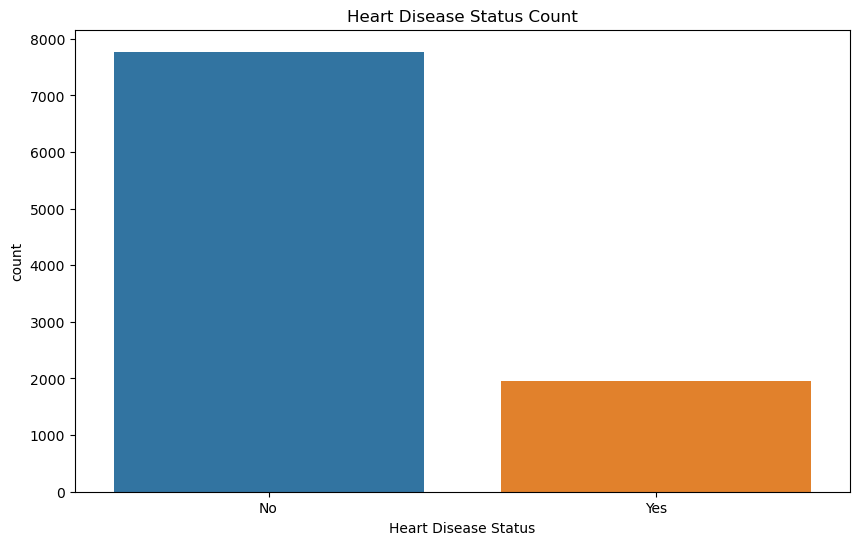

In [110]:
plt.figure(figsize=(10,6))
sns.countplot(x='Heart Disease Status', data=data)
plt.title('Heart Disease Status Count')
plt.show()

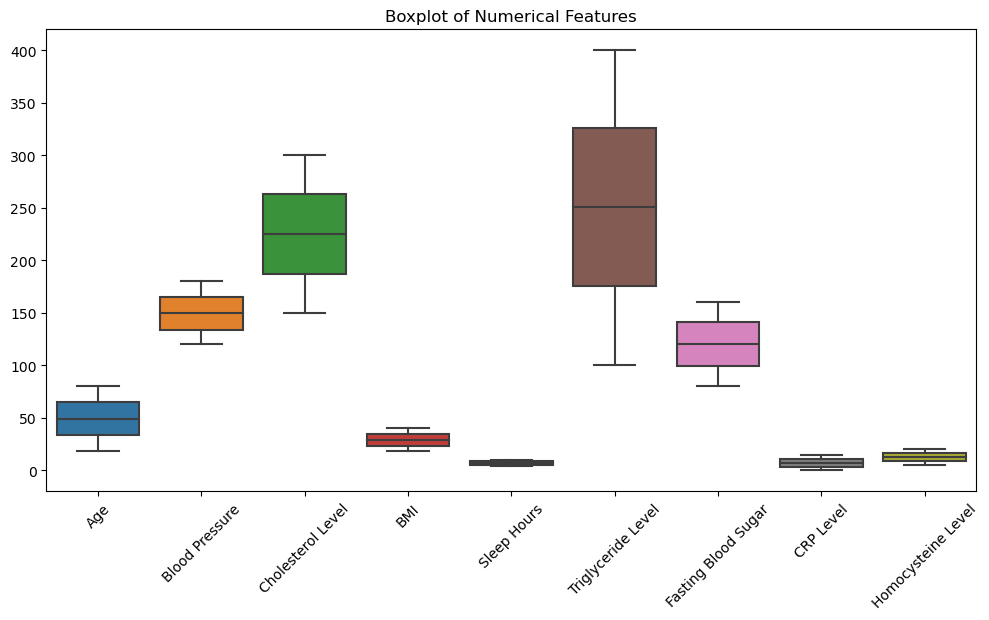

In [111]:
# Boxplot for numerical features
plt.figure(figsize=(12,6))
sns.boxplot(data=data.select_dtypes(include=['float64', 'int64']))
plt.title('Boxplot of Numerical Features')
plt.xticks(rotation=45)
plt.show()

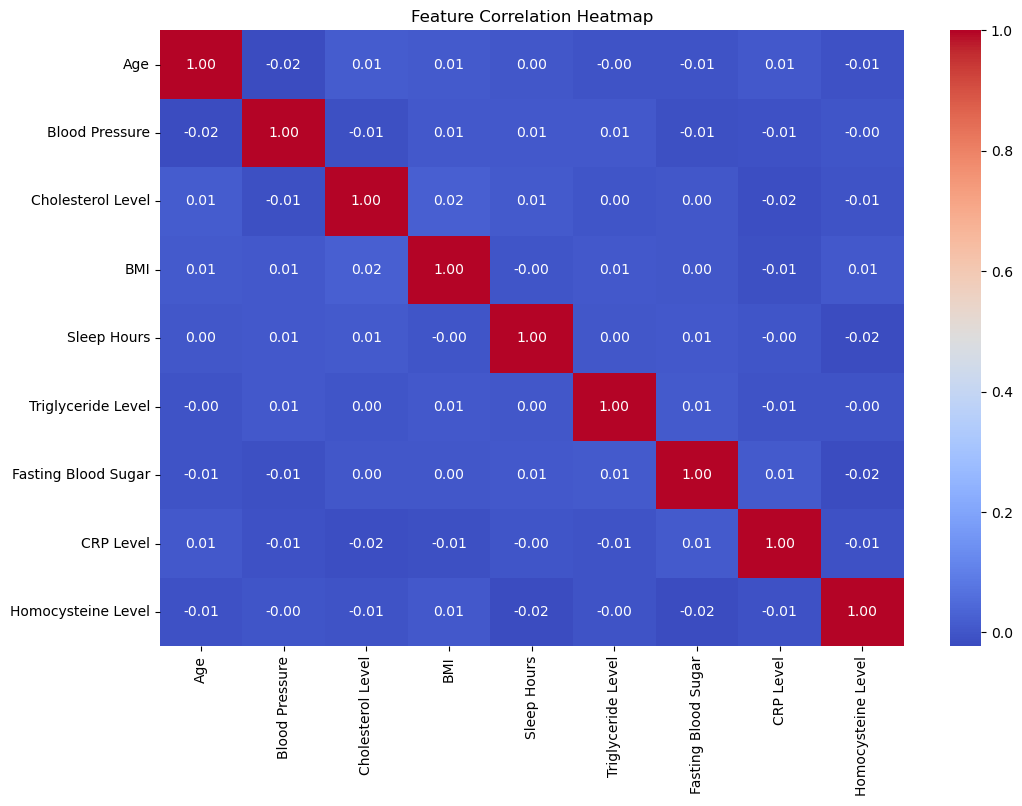

In [112]:
# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

In [113]:
# Encoding categorical variables
label_encoders = {}
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [114]:
# Data Preparation
X = data.drop(columns=['Heart Disease Status'])  # Features
y = data['Heart Disease Status']  # Target

In [115]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [116]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [117]:
# Modeling - Random Forest
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [118]:
y_pred_rf = rf_model.predict(X_test)
print('\nRandom Forest Model')
print('Accuracy:', accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Model
Accuracy: 0.8050411522633745
              precision    recall  f1-score   support

           0       0.81      1.00      0.89      1566
           1       0.00      0.00      0.00       378

    accuracy                           0.81      1944
   macro avg       0.40      0.50      0.45      1944
weighted avg       0.65      0.81      0.72      1944



In [119]:
# Modeling - Logistic Regression
lr_model = LogisticRegression(max_iter=500)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [120]:
y_pred_lr = lr_model.predict(X_test)
print('\nLogistic Regression Model')
print('Accuracy:', accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Model
Accuracy: 0.8055555555555556
              precision    recall  f1-score   support

           0       0.81      1.00      0.89      1566
           1       0.00      0.00      0.00       378

    accuracy                           0.81      1944
   macro avg       0.40      0.50      0.45      1944
weighted avg       0.65      0.81      0.72      1944



In [121]:
# Advanced Machine Learning - Hyperparameter Tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [122]:
# Best Model Evaluation
best_lr_model = grid_search.best_estimator_
y_pred_best = best_lr_model.predict(X_test)

best_accuracy = accuracy_score(y_test, y_pred_best)
best_auc = roc_auc_score(y_test, y_pred_best)
best_report = classification_report(y_test, y_pred_best)

print(f'\nBest Logistic Regression Model Accuracy: {best_accuracy}')
print(f'Best ROC AUC Score: {best_auc}')
print('Best Model Classification Report:\n', best_report)


Best Logistic Regression Model Accuracy: 0.8055555555555556
Best ROC AUC Score: 0.5
Best Model Classification Report:
               precision    recall  f1-score   support

           0       0.81      1.00      0.89      1566
           1       0.00      0.00      0.00       378

    accuracy                           0.81      1944
   macro avg       0.40      0.50      0.45      1944
weighted avg       0.65      0.81      0.72      1944

